## CBOT SRW nearest futures nominal vs inflation adjusted prices (USD/t)


### Preparing data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [63]:
# Download SRW price, calculation average price
SRW = pd.read_excel('SRW/SRW.xlsx')
SRW['Year_Month'] = pd.to_datetime(SRW['Date']).dt.to_period('M')
SRW['Ave_SRW'] = (SRW['Open'] + SRW['High'] + SRW['Low'] + SRW['Price'])/4

# Download inflation set with accumulated inflation coificient('AIC')
INFL = pd.read_excel('inflation/inflation_world.xlsx')
INFL['Year_Month'] = pd.to_datetime(INFL['Date']).dt.to_period('M')
SRW = SRW[[ 'Date', 'Price', 'Open', 'High', 'Low', 'Ave_SRW', 'Year_Month']]

# Conver ¢/bush to USD/tonn
def c_bu_to_usd_t(price):
    return price * 0.367437

for p in ['Price', 'Open', 'High', 'Low', 'Ave_SRW']:
    SRW[p] = SRW[p].apply(c_bu_to_usd_t)

SRW.head(5)

,Date,Price,Open,High,Low,Ave_SRW,Year_Month
0,2022-08-01,297.256533,298.634422,303.870399,266.667403,291.607189,2022-08
1,2022-07-01,296.797237,321.874812,326.284056,277.047498,305.500901,2022-07
2,2022-06-01,319.210894,400.873767,407.395774,319.486471,361.741727,2022-06
3,2022-05-01,399.587738,381.215888,471.789108,378.184532,407.694316,2022-05
4,2022-04-01,383.512369,370.100918,417.040995,361.006853,382.915284,2022-04


### Adjusting with inflation

In [64]:
# Create new set and combiing with inflation set
SRWi = pd.merge(SRW[[ 'Date', 'Price', 'Open', 'High', 'Low', 'Ave_SRW', 'Year_Month']], INFL[['AIC', 'Year_Month']], on=('Year_Month'), how ='left')

# Fill in inflation and cleaning inflation off price (contrary to NPV calculation)
SRWi['AIC'] = SRWi['AIC'].interpolate()

In [65]:
#Abjusting procedure
SRWi['Ave_SRW'] = SRWi['AIC']*SRWi['Ave_SRW']
SRWi['Price'] = SRWi['AIC']*SRWi['Price']
SRWi['Open'] = SRWi['AIC']*SRWi['Open']
SRWi['High'] = SRWi['AIC']*SRWi['High']
SRWi['Low'] = SRWi['AIC']*SRWi['Low']

SRWi.head()

,Date,Price,Open,High,Low,Ave_SRW,Year_Month,AIC
0,2022-08-01,297.256533,298.634422,303.870399,266.667403,291.607189,2022-08,1.000000
1,2022-07-01,298.790018,324.035971,328.474820,278.907674,307.552121,2022-07,1.006714
2,2022-06-01,323.497440,406.256929,412.866517,323.776718,366.599401,2022-06,1.013429
3,2022-05-01,407.636576,388.894665,481.292289,385.802249,415.906445,2022-05,1.020143
4,2022-04-01,393.812415,380.040771,428.241525,370.702465,393.199294,2022-04,1.026857


### Mean of means comparison (USD/t.)

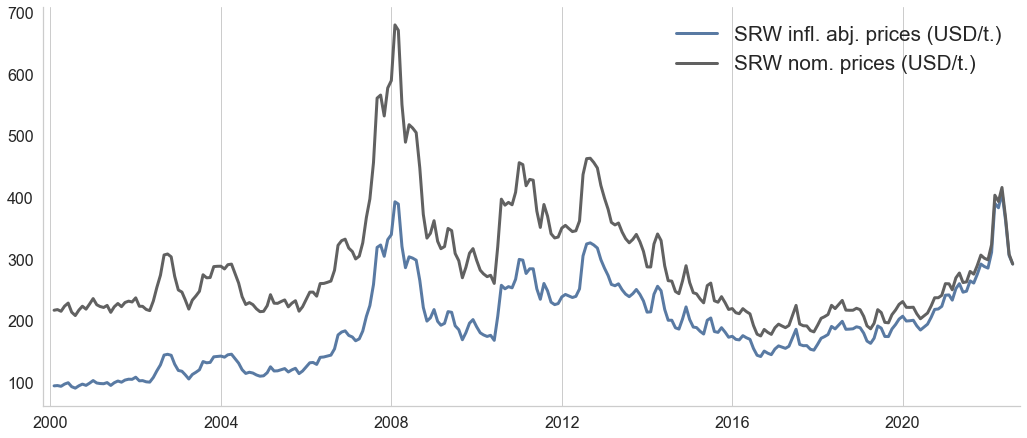

In [66]:
fig = plt.figure(figsize=(17.5,7.35))
ax = fig.add_subplot()

plt.plot(SRW['Date'], SRW['Ave_SRW'], 
         color=(0.35, 0.48, 0.64),
         label = 'SRW infl. abj. prices (USD/t.)',
         linewidth=3
        )

plt.plot(SRWi['Date'], SRWi['Ave_SRW'], 
         color=(0.38, 0.38, 0.38),
         label = 'SRW nom. prices (USD/t.)',
         linewidth=3
        )

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_xlim([datetime.date(1999, 11, 1), datetime.date(2022, 10, 1)])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

ax.legend(fontsize='xx-large', frameon=False)
plt.grid(axis='y', linestyle='--', linewidth=1)
plt.show()

### DIstribution comparsion

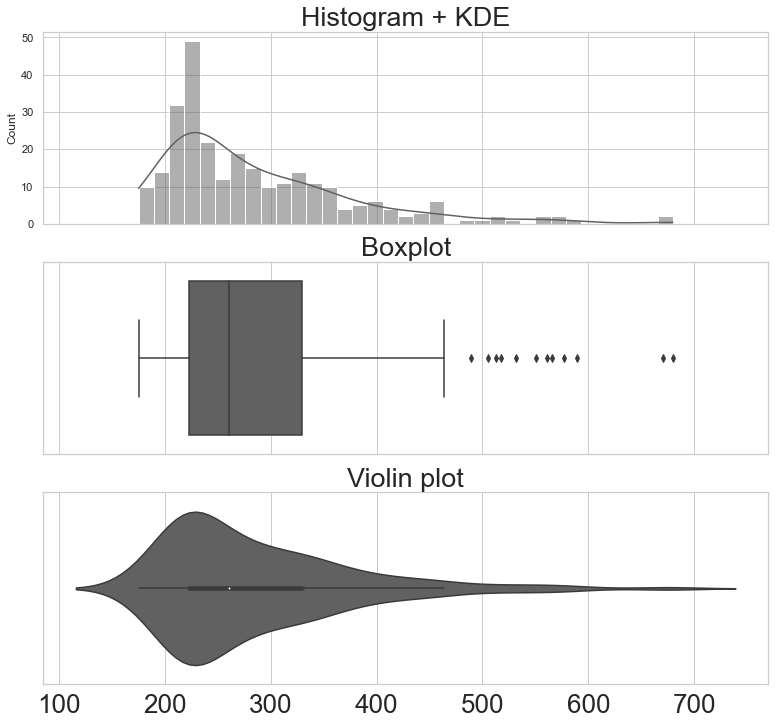

In [67]:
# Preparing function for reflecting distribution
def plot_comparison(x, title, c):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(13,12))      
    sns.histplot(x=x, ax=ax[0], kde=True, bins=35, color = c)  
    ax[0].set_title('Histogram + KDE', size=27)                          
    sns.boxplot(x=x, ax=ax[1], color = c).set(xlabel=None)                
    ax[1].set_title('Boxplot', size=27)
    sns.violinplot(x=x, ax=ax[2], color = c).set(xlabel=None)
    ax[2].set_title('Violin plot', size=27)                                                    
    plt.xticks(fontsize=26)
    plt.show()
    

plot_comparison(SRWi['Ave_SRW'], 'Standard Normal Distribution SRW_infl_abj', (0.38, 0.38, 0.38))

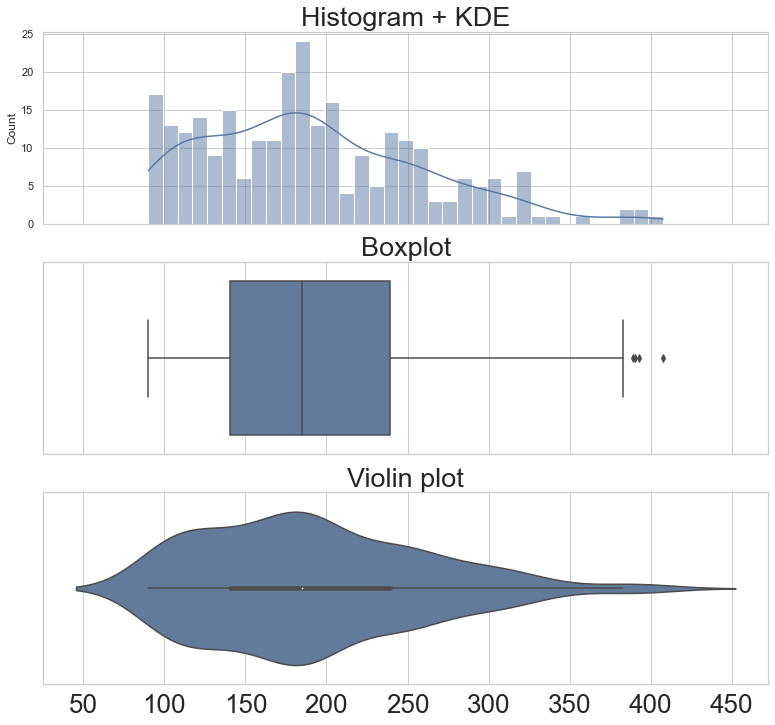

In [68]:
plot_comparison(SRW['Ave_SRW'], 'Standard Normal Distribution SRW_infl_abj', (0.35, 0.48, 0.64))

In [69]:
dict(SRW['Ave_SRW'].describe().round(2))

{'count': 271.0,
 'mean': 191.58,
 'std': 68.41,
 'min': 90.02,
 '25%': 140.46,
 '50%': 184.96,
 '75%': 239.4,
 'max': 407.69}

In [70]:
dict(SRWi['Ave_SRW'].describe().round(2))

{'count': 271.0,
 'mean': 286.01,
 'std': 90.76,
 'min': 174.8,
 '25%': 222.09,
 '50%': 260.07,
 '75%': 328.96,
 'max': 679.9}